<a href="https://colab.research.google.com/github/Feru34/Modelos_Toronbolo/blob/main/k_Nearest_Neighbor_and_Clustering_k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementción k-Nearest Neighbor y Clustering k-Means AI Computer Society

Integrantes:
- Felipe Rueda
- Johan Suarez

# k-Nearest Neighbor

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
import time

In [14]:
# Load data
data = pd.read_csv('data.csv', index_col='id').reset_index(drop=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

# Preview data
print('Dataframe shape:', data.shape)
data.head(3)

Dataframe shape: (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
# Features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encode target to binary
y = (y=='M').astype('int')

In [16]:
# Split dataset into training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [20]:
class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))

    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)

    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours, keepdims=True).mode[0]

            preds.append(majority)
        return np.array(preds)

    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()

        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))

        # Sort distances
        distances.sort(key=lambda x: x[0])

        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])

        return neighbours

In [21]:
#  Function to calculate accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')

Metric: euclidean, accuracy: 87.719 %
Metric: manhattan, accuracy: 91.228 %


In [22]:
# Function to calculate accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')

Metric: euclidean, accuracy: 87.719 %
Metric: manhattan, accuracy: 91.228 %


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener matriz de confusión
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)

    # Matriz de confusión
    cm = confusion_matrix(y_test, preds)
    print(f"Metric: {metric}")
    print("Confusion Matrix:")
    print(cm)


## Resulatdos

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener matriz de confusión
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)

    # Matriz de confusión
    cm = confusion_matrix(y_test, preds)
    print(f"Metric: {metric}")
    print("Confusion Matrix:")
    print(cm)


Metric: euclidean
Confusion Matrix:
[[71  9]
 [ 5 29]]
Metric: manhattan
Confusion Matrix:
[[75  5]
 [ 5 29]]


In [24]:
    # Reporte de clasificación
    print("Classification Report:")
    print(classification_report(y_test, preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.85      0.85      0.85        34

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



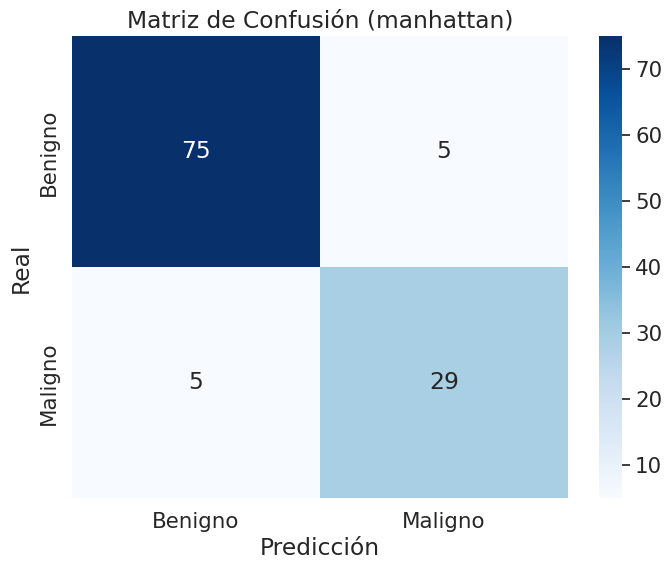

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.title(f"Matriz de Confusión ({metric})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# Clustering k-Means